<a href="https://colab.research.google.com/github/Rishu5kumar/Raw_Word_Embeddings/blob/main/Training_Word_Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Word embeddings** are essential for representing words in a numerical format that an RNN can process. The idea is to convert words into dense vectors that capture their meaning and relationships.

 Word2Vec is a popular technique for word embedding. It transforms words into numerical vectors, capturing their meanings in a continuous vector space. These vectors are positioned such that words with similar meanings are close to each other in the vector space. Word2Vec was developed by Tomas Mikolov and his team at Google.

Here no built-in library used except neural network.

**We can use gensim library to get word emebeddinds directly.**

Steps to create Word2vec:

1. Tokenize the sentences.
2. Create histograms.
3. Take most frequent words.
4. Create the matrix with all the unique words. It also represent the occurence relation between the words.

### Loading Data

In [ ]:
file = open('Royal_data.txt', 'r')
royal_data = file.readlines()
print(royal_data)
file.close()

['The future king is the prince\n', 'Daughter is the princess\n', 'Son is the prince\n', 'Only a man can be a king\n', 'Only a woman can be a queen\n', 'The princess will be a queen\n', 'The prince is a strong man\n', 'The princess is a beautiful woman\n', 'Prince is only a boy now\n', 'Prince will be king\n', 'A boy will be a man\n']


### Removing '\n' from the end of every sentence and convert the sentence into lowercase


In [ ]:
for i in range(len(royal_data)):
    royal_data[i] = royal_data[i].lower().replace('\n', '')

print(royal_data)

['the future king is the prince', 'daughter is the princess', 'son is the prince', 'only a man can be a king', 'only a woman can be a queen', 'the princess will be a queen', 'the prince is a strong man', 'the princess is a beautiful woman', 'prince is only a boy now', 'prince will be king', 'a boy will be a man']


### Removing stop words and tokenize

In [ ]:
stopwords = ['the', 'is', 'will', 'be', 'a', 'only', 'can', 'their', 'now', 'and', 'at', 'it']

filtered_data = [] # it will store tokenized sentences after removing stopwords
for sent in royal_data:
    temp = []
    for word in sent.split():
        if word not in stopwords:
            temp.append(word)
    filtered_data.append(temp)

print(filtered_data)

[['future', 'king', 'prince'], ['daughter', 'princess'], ['son', 'prince'], ['man', 'king'], ['woman', 'queen'], ['princess', 'queen'], ['prince', 'strong', 'man'], ['princess', 'beautiful', 'woman'], ['prince', 'boy'], ['prince', 'king'], ['boy', 'man']]


### Creating bigrams

In [ ]:
bigrams = []
for words_list in filtered_data:
    for i in range(len(words_list) - 1):
        for j in range(i+1, len(words_list)):
            bigrams.append([words_list[i], words_list[j]])
            bigrams.append([words_list[j], words_list[i]])


print(bigrams)

[['future', 'king'], ['king', 'future'], ['future', 'prince'], ['prince', 'future'], ['king', 'prince'], ['prince', 'king'], ['daughter', 'princess'], ['princess', 'daughter'], ['son', 'prince'], ['prince', 'son'], ['man', 'king'], ['king', 'man'], ['woman', 'queen'], ['queen', 'woman'], ['princess', 'queen'], ['queen', 'princess'], ['prince', 'strong'], ['strong', 'prince'], ['prince', 'man'], ['man', 'prince'], ['strong', 'man'], ['man', 'strong'], ['princess', 'beautiful'], ['beautiful', 'princess'], ['princess', 'woman'], ['woman', 'princess'], ['beautiful', 'woman'], ['woman', 'beautiful'], ['prince', 'boy'], ['boy', 'prince'], ['prince', 'king'], ['king', 'prince'], ['boy', 'man'], ['man', 'boy']]


### Getting a list of unique words

In [ ]:
all_words = [] # here all the unique words will be present

# for bi in bigrams:
#     all_words.extend(bi)

for sent in filtered_data:
  all_words.extend(sent)
# The extend() function iterates over the elements of the given iterable and adds them one by one to the end of the list.

all_words = list(set(all_words))
all_words.sort()

print(all_words)
print("Total number of unique words are:", len(all_words))

['beautiful', 'boy', 'daughter', 'future', 'king', 'man', 'prince', 'princess', 'queen', 'son', 'strong', 'woman']
Total number of unique words are: 12


### Creating dictionary of words

In [ ]:
words_dict = {}

counter = 0
for word in all_words:
    words_dict[word] = counter
    counter += 1

print(words_dict)

{'beautiful': 0, 'boy': 1, 'daughter': 2, 'future': 3, 'king': 4, 'man': 5, 'prince': 6, 'princess': 7, 'queen': 8, 'son': 9, 'strong': 10, 'woman': 11}


### Performing one-hot encoding

In [ ]:
import numpy as np

onehot_data = np.zeros((len(all_words), len(all_words))) # it will create a matrix of 12*12

for i in range(len(all_words)):
    onehot_data[i][i] = 1

onehot_dict = {}
for i in range(len(all_words)):
    onehot_dict[all_words[i]] = onehot_data[i]

for word in onehot_dict:
    print(word, ":", onehot_dict[word])

beautiful : [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
boy : [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
daughter : [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
future : [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
king : [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
man : [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
prince : [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
princess : [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
queen : [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
son : [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
strong : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
woman : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [ ]:
X = []
Y = []

for bi in bigrams:
    X.append(onehot_dict[bi[0]])
    Y.append(onehot_dict[bi[1]])

X = np.array(X)
Y = np.array(Y)

In [ ]:
print(X)

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.

In [ ]:
print(Y)

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1.

### Model

In [ ]:
import tensorflow as tf

embed_size = 2 # number of neurons in hidden layer which means size of word embedding vectors is also 2

# model = tf.keras.models.Sequential([
#     tf.keras.models.Dense(embed_size, activation='linear'),
#     tf.keras.models.Dense(Y.shape[1], activation = 'softmax')
# ])


# Define a Sequential model
model = tf.keras.models.Sequential()

# Let's assume input data has 10 features
# model.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(10,)))
'''
- 64 represents the number of neurons (units) in this hidden layer.
64 neurons in this layer. Each neuron is connected to all 10 features in the input data.

- input_shape=(10,) means that the input data has 10 features,
so each sample passed into the network is expected to be a vector of 10 values.
The network expects each input sample to have 10 features. This is passed only in the first layer of a Sequential model.

- activation='relu' applies the ReLU (Rectified Linear Unit) activation function to the outputs of the 64 neurons.
'''


# The 'embed_size' defines the dimensionality of the output space for the layer

# Here, 'Y.shape[1]' refers to the number of output classes (assuming Y is a one-hot encoded output)
# For example, if we have 3 output classes, this layer will have 3 neurons

model.add(tf.keras.layers.Dense(embed_size, activation='linear')) # hidden layer
model.add(tf.keras.layers.Dense(Y.shape[1], activation='softmax')) # output layer

# 'categorical_crossentropy' is used for multi-class classification problems
# 'adam' is a popular optimizer for deep learning models
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam')

model.summary()  # This prints the model structure(optional)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X, Y, epochs = 1000, batch_size = 256, verbose = False)

In [ ]:
weights = model.get_weights()[0]
# The weights i am retrieving using model.get_weights()[0] refer to the weights of the first hidden layer, not the input layer.
# weights refers to the weight matrix associated with the first hidden layer.
'''
weights[0] is a 2D array (matrix) with dimensions (a, b), where a is the number of input features and b is the number of neurons in the first hidden layer.
weights[1] is a 1D array with length b, which contains the biases for the first hidden layer.
'''

word_embeddings = {}
for word in all_words:
    word_embeddings[word] = weights[words_dict[word]]

**Code Breakdown**
1. weights = model.get_weights()[0]

- This line retrieves the weights from the first layer of the neural network model.
- In a typical word embedding model, the first layer's weights represent the embeddings for each word in your vocabulary.
- The [0] is used to get the first element of the weights list, which corresponds to the weight matrix of the first layer.

2. word_embeddings = {}

- This line initializes an empty dictionary called word_embeddings.
- This dictionary will be used to store the word embeddings (numerical representations) for each word.

3. for word in all_words:

- This loop iterates over each word in the list all_words, which presumably contains all the words from your vocabulary.

4. word_embeddings[word] = weights[words_dict[word]]

- For each word, it retrieves its corresponding embedding from the weights matrix using words_dict[word] as the index.
- Here, words_dict is likely a dictionary that maps each word to its index in the weights matrix.
- The embedding for each word is then stored in the word_embeddings dictionary, where the key is the word and the value is its corresponding vector (the embedding).

Summary
- This code extracts the word embeddings from the model’s weights and organizes them into a dictionary (word_embeddings), where each word is associated with its numerical representation. This allows you to easily look up the embedding for any word in your vocabulary.

In [ ]:
for word in all_words:
  print(word,":",word_embeddings[word])

beautiful : [1.2051277 0.5060915]
boy : [ 0.27411655 -1.6090009 ]
daughter : [0.9865224  0.60021055]
future : [-0.44248456 -0.47768676]
king : [-0.14008856 -1.1660178 ]
man : [-1.4641078 -0.1696603]
prince : [-1.1447244   0.13550328]
princess : [0.7141948 1.147843 ]
queen : [0.548962  0.3461353]
son : [ 0.12691432 -0.6707844 ]
strong : [ 0.11894244 -0.79541   ]
woman : [1.3101785 1.0190849]


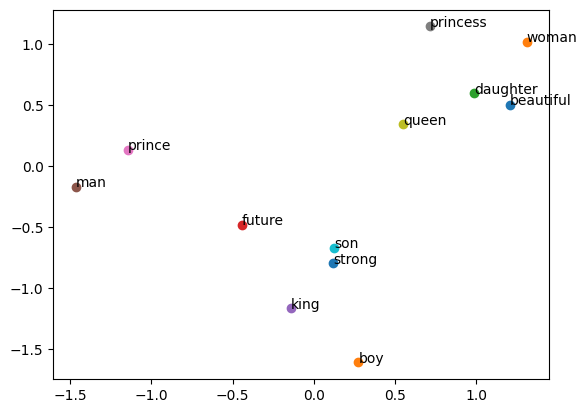

In [ ]:
import matplotlib.pyplot as plt

# plt.figure(figsize = (10, 10))
for word in list(words_dict.keys()):
    coord = word_embeddings.get(word)
    plt.scatter(coord[0], coord[1])
    plt.annotate(word, (coord[0], coord[1]))

plt.savefig('img.jpg')

**Code Breakdown**
1. import matplotlib.pyplot as plt

- This line imports the matplotlib.pyplot module, which is a popular library in Python for creating static, animated, and interactive visualizations in Python.
2. # plt.figure(figsize = (10, 10))

- This line is commented out, but if it were active, it would create a new figure for the plot with a size of 10x10 inches. This helps in controlling the size of the plot.

3. for word in list(words_dict.keys()):

- This line starts a loop that iterates over each word in words_dict. words_dict.keys() returns the keys (words) in the dictionary, and list() converts them into a list.

4. coord = word_embeddings.get(word)

- For each word in the loop, this line retrieves its corresponding embedding coordinates (a 2D vector) from the word_embeddings dictionary.
- coord will hold the numerical representation of the word in a 2D space.

5. plt.scatter(coord[0], coord[1])

- This line plots a point in a 2D scatter plot using the x-coordinate coord[0] and the y-coordinate coord[1]. Each point represents a word's embedding.

6. plt.annotate(word, (coord[0], coord[1]))

- This line adds a label (the word itself) next to its corresponding point on the scatter plot at the position (coord[0], coord[1]). This makes it easier to identify which point corresponds to which word.

7. plt.savefig('img.jpg')

- Finally, this line saves the created scatter plot as an image file named img.jpg in the current working directory.

Summary
- This code creates a scatter plot of word embeddings, where each point represents a word in a 2D space. The words are labeled on the plot for easy identification. After plotting, the figure is saved as img.jpg. This visualization helps in understanding the relationships between words based on their embeddings.

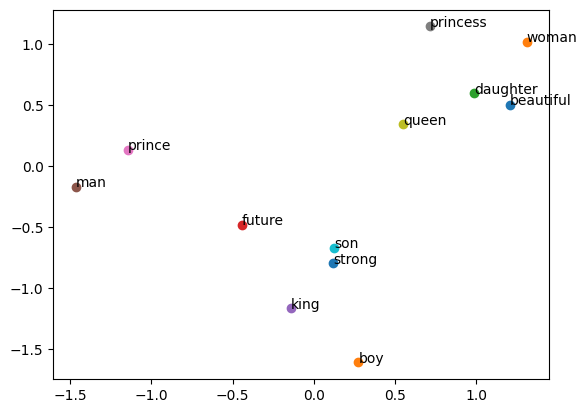

In [ ]:
import matplotlib.pyplot as plt
for word in all_words:
  coord = word_embeddings[word]
  plt.scatter(coord[0], coord[1])
  plt.annotate(word, (coord[0], coord[1]))

**Epochs**
Definition: An epoch is one complete pass through the entire training dataset during the training of a neural network.

Purpose: Specifying the number of epochs determines how many times the model will learn from the entire dataset. More epochs can lead to better learning, but too many can cause overfitting, where the model performs well on the training data but poorly on unseen data.


**Batch Size**

Definition: Batch size is the number of training samples used in one iteration of the model's training. Instead of processing the entire dataset at once, the model processes smaller subsets (batches).

Purpose: Specifying the batch size allows for more efficient memory usage and faster computation. Smaller batches can lead to more updates per epoch, potentially improving learning, while larger batches may provide more stable gradient estimates but require more memory.


**Verbose**

Definition: The verbose parameter controls the level of output displayed during training.
Values:
0: No output.
1: Progress bar (default behavior, shows training progress).
2: One line per epoch (less detailed than verbose=1).

Purpose: It helps users monitor the training process, providing insights into the training progress and loss metrics at different epochs.
Example Usage
Here’s how you might see these parameters used in a model training call:

```
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)
```
In this example:

The model will train for 10 epochs.
Each training iteration will use a batch size of 32 samples.
The training progress will be shown with a progress bar (due to verbose=1).


Let’s break this down into simple terms.

**Epoch**: An epoch is one complete pass through the entire dataset. If you have 320 rows of data, one epoch means the model has seen all 320 rows once.

**Batch Size**: This refers to the number of rows processed at one time. In this case, your batch size is 32, which means the model will look at 32 rows before updating its internal parameters.

**Interpretation:**

1. Total Data: You have 320 rows of data in your dataset.

2. Batch Size of 32:

- Since your batch size is 32, the model will process the data in chunks (batches) of 32 rows.
- To process all 320 rows, the model will need to go through 320/32
= 10 batches in one epoch. This means it will perform 10 updates to its parameters during each epoch, once for each batch of 32 rows.

3. Epoch of 1000:

- Now, if you set the number of epochs to 1000, it means the model will go through the entire dataset 1000 times.
- In practical terms, after 1000 epochs, the model will have seen all 320 rows a total of 1000×320=320,000 times.

**Summary:**
1. In your training setup:
- The model will look at the data in chunks of 32 rows (batch size).
- It will go through the entire dataset 1000 times (epochs).
- For each epoch, the model makes 10 updates based on the batches it processes.

2. This approach allows the model to learn from the data gradually, refining its understanding with each batch and each epoch.

**Visual Analogy:**
You can think of this as reading a book:

- Batch Size (32): Each time you read 32 pages at a time.
- Epochs (1000): After finishing the book (all 320 pages), you decide to read it again from the beginning 999 more times.

So, after 1000 readings, you’ve gone over all the pages a lot, helping you remember the content better!